![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Data cleaning and wrangling

For this lab, we will be using the Marketing Customer Value Analysis database from before. Feel free to build on top of your previous notebooks, since there could be overlap with variable names.

### Instructions

This lab will focus on data cleaning and wrangling, this is a crucial step in the EDA process.

1. Remove the outliers in the dataset using one of the methods we've discussed by defining a function and applying it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables.
4. Encode the categorical variables
5. Transform the time variables (`day`, `week` and `month`) to integers.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

**Hint for Categorical Variables**

- Use either encoding or `get_dummies` to deal with the categorical variables (example below):

```python
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
```



* First we will import the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Then we can read the data from the csv file

In [2]:
data = pd.read_csv("data-files/marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


* and we clean the headers with a function

In [3]:
def clean_headers(a):
    """
    Input is a dataset, it will put the column labels as lower case, strip the names and subsitute spaces with dashes
    """
    cols=[]
    for i in range(len(a.columns)):
        cols.append(a.columns[i].lower().strip().replace(" ","-"))
        
    a.columns = cols
    

In [4]:
clean_headers (data)
data.head()

,customer,state,customer-lifetime-value,response,coverage,education,effective-to-date,employmentstatus,gender,income,...,months-since-policy-inception,number-of-open-complaints,number-of-policies,policy-type,policy,renew-offer-type,sales-channel,total-claim-amount,vehicle-class,vehicle-size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1. Remove the outliers in the dataset using one of the methods we've discussed by defining a function and applying it to the dataframe.

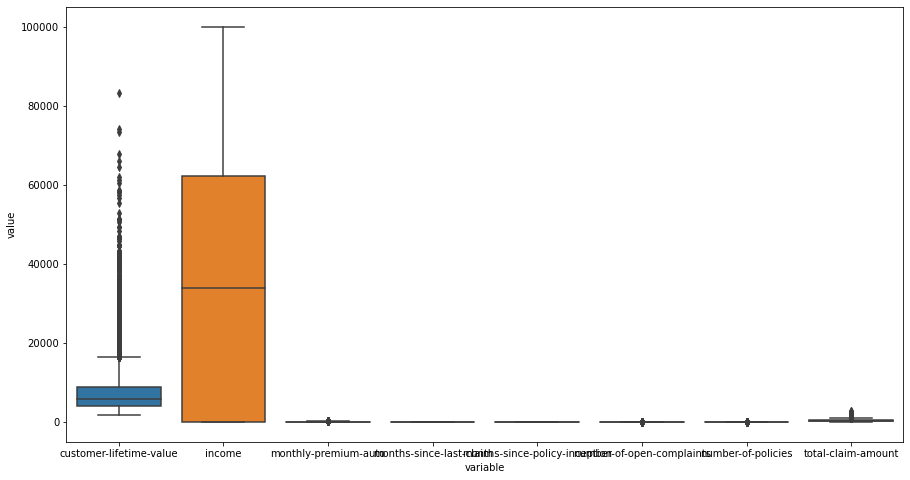

In [5]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(data.select_dtypes(include=np.number)));

* We define a function that removes the outliers that lay outside 1,5x the interquartile range from the mean. 

In [6]:
def clean_outliers(data,col):
    """
    Will input the column name as data['Column'], will return the dataframe modified, 
    with all data outside 1.5x the interquartile distance from the median. 
    """
    iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
    upper_limit = np.percentile(data[col],75) + 1.5*iqr
    lower_limit = np.percentile(data[col],25) - 1.5*iqr

    return data[(data[col]>lower_limit) & (data[col]<upper_limit)]

* And apply it to customer lifetime value as a starting point 

In [7]:
data =  clean_outliers (data,'customer-lifetime-value')

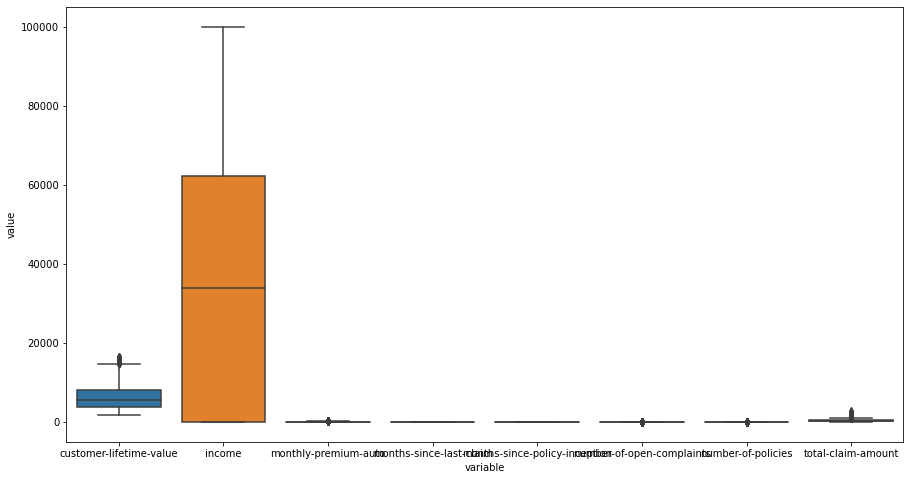

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(data.select_dtypes(include=np.number)));

* let´s remove income and customer-lifetime-value out of the graph to evaluate the rest of numerical columns

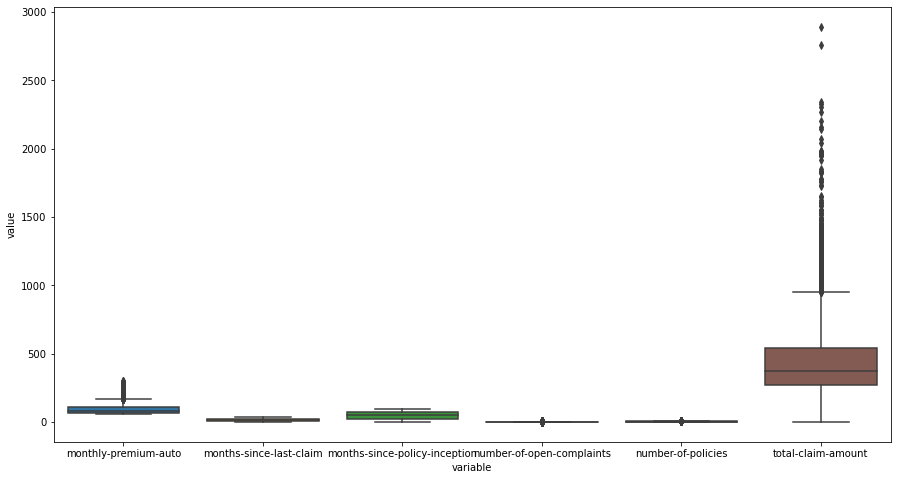

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", 
            y="value", 
            data=pd.melt(data.select_dtypes(include=np.number).drop(['customer-lifetime-value','income'],axis = 1))
           );

* seems like total-claim-amount and monthly-premium-auto have also a significant amount of outliers we can drop.

In [10]:
data = clean_outliers(data,'monthly-premium-auto')
data = clean_outliers(data,'total-claim-amount')


* lets look into number-of-open-complaints and number-of-policies for outliers

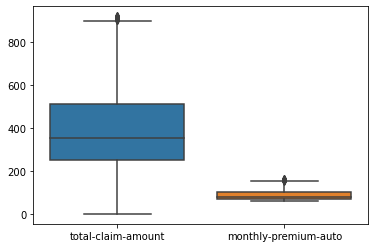

In [11]:
sns.boxplot(data=data[['total-claim-amount','monthly-premium-auto']]);

* These outliers don't seem too far from the limit, so we will keep them

## 2. Create a copy of the dataframe for the data wrangling.

In [12]:
datawr = data

datawr.shape

(7789, 24)

## 3. Normalize the continuous variables.

* We first separate the continuous variables and apply the normalizer

In [13]:
from sklearn.preprocessing import Normalizer

X = data.select_dtypes(np.number)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised, columns = X.columns )

* We can then substitute those colums in datawr

In [14]:
for col in X_normalised.columns:
    datawr[col] = X_normalised[col]

## 4.Encode the categorical variables

* In order to do this, we start by checking what we have to deal with:

In [15]:
datawr.select_dtypes(object)

,customer,state,response,coverage,education,effective-to-date,employmentstatus,gender,location-code,marital-status,policy-type,policy,renew-offer-type,sales-channel,vehicle-class,vehicle-size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,No,Premium,College,1/6/11,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


* We'll first drop the customer column, as the ID doesn't add any value to the data in this case.

In [16]:
datawr.drop(['customer'],axis = 1, inplace = True)

* let's check for null values in the database, and drop them 

In [17]:
datawr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7789 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          7789 non-null   object 
 1   customer-lifetime-value        6651 non-null   float64
 2   response                       7789 non-null   object 
 3   coverage                       7789 non-null   object 
 4   education                      7789 non-null   object 
 5   effective-to-date              7789 non-null   object 
 6   employmentstatus               7789 non-null   object 
 7   gender                         7789 non-null   object 
 8   income                         6651 non-null   float64
 9   location-code                  7789 non-null   object 
 10  marital-status                 7789 non-null   object 
 11  monthly-premium-auto           6651 non-null   float64
 12  months-since-last-claim        6651 non-null   f

In [18]:
datawr = datawr[datawr['customer-lifetime-value'].notna()]

datawr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6651 entries, 0 to 7788
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          6651 non-null   object 
 1   customer-lifetime-value        6651 non-null   float64
 2   response                       6651 non-null   object 
 3   coverage                       6651 non-null   object 
 4   education                      6651 non-null   object 
 5   effective-to-date              6651 non-null   object 
 6   employmentstatus               6651 non-null   object 
 7   gender                         6651 non-null   object 
 8   income                         6651 non-null   float64
 9   location-code                  6651 non-null   object 
 10  marital-status                 6651 non-null   object 
 11  monthly-premium-auto           6651 non-null   float64
 12  months-since-last-claim        6651 non-null   f

* Then let's check for typos, using a for loop:

In [19]:
for col in datawr.select_dtypes(object).drop(['effective-to-date'],axis = 1).columns:
    print(datawr[col].value_counts())
    print("------------------------------")

Oregon        2043
California    1937
Arizona       1362
Nevada         681
Washington     628
Name: state, dtype: int64
------------------------------
No     5664
Yes     987
Name: response, dtype: int64
------------------------------
Basic       4209
Extended    1973
Premium      469
Name: coverage, dtype: int64
------------------------------
Bachelor                1989
College                 1984
High School or Below    1864
Master                   544
Doctor                   270
Name: education, dtype: int64
------------------------------
Employed         4255
Unemployed       1586
Medical Leave     307
Disabled          293
Retired           210
Name: employmentstatus, dtype: int64
------------------------------
F    3419
M    3232
Name: gender, dtype: int64
------------------------------
Suburban    4089
Rural       1363
Urban       1199
Name: location-code, dtype: int64
------------------------------
Married     3962
Single      1678
Divorced    1011
Name: marital-status, dt

All columns seem in order, 
## 5. Transform the time variables (day, week and month) to integers.

In [20]:
datawr['effective-to-date'] = pd.to_datetime(datawr['effective-to-date'])

<ipython-input-20-28b9a3566062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawr['effective-to-date'] = pd.to_datetime(datawr['effective-to-date'])


* and then extract the individual values, and add them to new columns

In [21]:
datawr['day'] = list(map(lambda d: d.day,datawr['effective-to-date'] ))
datawr['month']  = list(map(lambda m: m.month,datawr['effective-to-date'] ))
datawr['year']  = list(map(lambda y: y.year,datawr['effective-to-date'] ))

<ipython-input-21-2bfbf4a2a08d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawr['day'] = list(map(lambda d: d.day,datawr['effective-to-date'] ))
<ipython-input-21-2bfbf4a2a08d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datawr['month']  = list(map(lambda m: m.month,datawr['effective-to-date'] ))
<ipython-input-21-2bfbf4a2a08d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

* we can also drop the original date time column

In [22]:
datawr.drop(['effective-to-date'],axis = 1, inplace = True)

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

* We first check the types of each column

In [23]:
datawr.dtypes

state                             object
customer-lifetime-value          float64
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
income                           float64
location-code                     object
marital-status                    object
monthly-premium-auto             float64
months-since-last-claim          float64
months-since-policy-inception    float64
number-of-open-complaints        float64
number-of-policies               float64
policy-type                       object
policy                            object
renew-offer-type                  object
sales-channel                     object
total-claim-amount               float64
vehicle-class                     object
vehicle-size                      object
day                                int64
month                              int64
year            

* Then put the categoricals into a dataframe, and then use get_dummies for the encoding.

In [27]:
categorical = datawr.select_dtypes(object)

In [28]:
encoded = pd.get_dummies(categorical, columns = categorical.columns)

In [29]:
encoded

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales-channel_Branch,sales-channel_Call Center,sales-channel_Web,vehicle-class_Four-Door Car,vehicle-class_SUV,vehicle-class_Sports Car,vehicle-class_Two-Door Car,vehicle-size_Large,vehicle-size_Medsize,vehicle-size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,0,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7785,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
7786,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
7787,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0


* Now let's concatenate these columns, and drop the old categorical ones.

In [30]:
datawr = pd.concat([datawr, encoded], axis=1)

In [32]:
datawr.drop(categorical.columns,axis = 1, inplace = True)